In [75]:
from keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

### Changing of image size (from 2D to 1D)

In [76]:
X_train.shape

(60000, 28, 28)

In [77]:
from keras.utils import np_utils
Input_size=X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],Input_size)
X_train = X_train.astype('float')
X_train = X_train/X_train.max()

X_test = X_test.reshape(X_test.shape[0],Input_size)
X_test = X_test.astype('float')
X_test = X_test/X_test.max()

### Encoding of the target variable (form 1 dimension to 10)

In [78]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)
Nb_Classe=unique.shape[0]
Nb_Classe

10

In [79]:
Y_train=np_utils.to_categorical(Y_train,Nb_Classe)
Y_test=np_utils.to_categorical(Y_test,Nb_Classe)

# 01 - Frist model
## Loading of the libraries

In [12]:
from keras import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

## Simpliest model

In [45]:
model=Sequential()
model.add(Dense(Nb_Classe,input_shape=(Input_size,),kernel_initializer='random_uniform'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [73]:
Batch_Size=10000
Nb_Epoch=10
model.fit(X_train,Y_train,batch_size=Batch_Size,epochs=Nb_Epoch,validation_split=0.02)

Train on 58800 samples, validate on 1200 samples
Epoch 1/10
58800/58800 [==============================] - 0s 8us/step - loss: 1.7807 - acc: 0.5890 - val_loss: 1.5336 - val_acc: 0.6408
Epoch 2/10
58800/58800 [==============================] - 0s 8us/step - loss: 1.7046 - acc: 0.6006 - val_loss: 1.4618 - val_acc: 0.6592
Epoch 3/10
58800/58800 [==============================] - 0s 8us/step - loss: 1.6355 - acc: 0.6121 - val_loss: 1.3974 - val_acc: 0.6775
Epoch 4/10
58800/58800 [==============================] - 0s 8us/step - loss: 1.5729 - acc: 0.6231 - val_loss: 1.3395 - val_acc: 0.6967
Epoch 5/10
58800/58800 [==============================] - 0s 8us/step - loss: 1.5162 - acc: 0.6333 - val_loss: 1.2876 - val_acc: 0.7067
Epoch 6/10
58800/58800 [==============================] - 1s 9us/step - loss: 1.4649 - acc: 0.6427 - val_loss: 1.2413 - val_acc: 0.7217
Epoch 7/10
58800/58800 [==============================] - 0s 8us/step - loss: 1.4187 - acc: 0.6509 - val_loss: 1.2002 - val_acc: 0.7358

In [81]:
model.evaluate(X_test,Y_test)[1]

10000/10000 [==============================] - 0s 16us/step


0.6742

### Testing different value for epoch and adding dropout

In [117]:
import pandas as pd
Result_epochs=pd.DataFrame({'Nb':[],'Train':[],'Test':[]})
Result_dropout=pd.DataFrame({'Nb':[],'Train':[],'Test':[]})

for j in range(1,31):
    i = j*10
    print(i)
    model.fit(X_train,Y_train,batch_size=Batch_Size,epochs=i,validation_split=0.2,verbose=False)
    Result_epochs=Result_epochs.append(pd.DataFrame({'Nb':[i],
                                                     'Train':[model.evaluate(X_train,Y_train,verbose=False)[1]],
                                                     'Test':[model.evaluate(X_test,Y_test,verbose=False)[1]]}))

from keras.layers import Dropout

Batch_Size=10000
Nb_Epoch=100
print('Test dropout')

for j in range(1,26):
    i = j*2/100
    print(i)
    model=Sequential()
    model.add(Dense(Nb_Classe,input_shape=(Input_size,),kernel_initializer='random_uniform'))
    model.add(Dropout(i))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
    model.fit(X_train,Y_train,batch_size=Batch_Size,epochs=Nb_Epoch,validation_split=0.2,verbose=False)
    Result_dropout=Result_dropout.append(pd.DataFrame({'Nb':[i],
                                                       'Train':[model.evaluate(X_train,Y_train,verbose=False)[1]],
                                                       'Test':[model.evaluate(X_test,Y_test,verbose=False)[1]]}))


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
Test dropout
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5


#### Graph the results

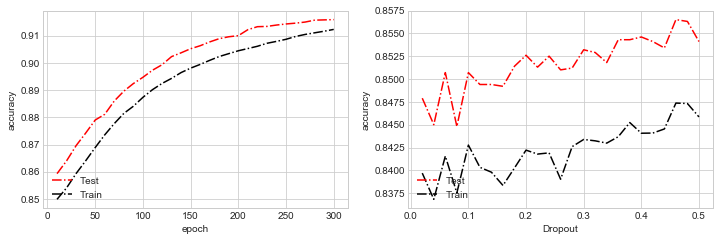

In [147]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

ax1.plot(Result_epochs.Nb, Result_epochs.Test, color='red', linestyle='dashdot', label='Test')
ax1.plot(Result_epochs.Nb, Result_epochs.Train, color='black', linestyle='dashdot', label='Train')
# Les labels
#ax1.title("Evolution Accuracy par epoch")
ax1.legend(loc='lower left');
# Titres des axes
ax1.set(xlabel='epoch', ylabel='accuracy')

ax2.plot(Result_dropout.Nb, Result_dropout.Test, color='red', linestyle='dashdot', label='Test')
ax2.plot(Result_dropout.Nb, Result_dropout.Train, color='black', linestyle='dashdot', label='Train')
# Les labels
#ax2.title("Evolution Accuracy par epoch")
ax2.legend(loc='lower left');
# Titres des axes
ax2.set(xlabel='Dropout', ylabel='accuracy')
plt.show()

#### Save the results

In [118]:
Result_epochs.to_pickle('Result_epochs')
Result_dropout.to_pickle('Result_dropout')

#### Weight of the model

In [180]:
weight = model.layers[0].get_weights()
print(len(weight))
print(len(weight[0]))
print(len(weight[1]))

2
784
10


### Save the model


In [ ]:
from keras.models import load_model
model.save('First_model.h5')

##### Checking

In [186]:
test=load_model('First_model.h5')
weight = test.layers[0].get_weights()
print(len(weight))
print(len(weight[0]))
print(len(weight[1]))

2
784
10


In [200]:
test.predict(X_test[0:1,0:])

array([[0.12292343, 0.04651721, 0.25592884, 0.12255327, 0.01089196,
        0.126702  , 0.19542624, 0.00894145, 0.09122355, 0.01889207]],
      dtype=float32)

In [202]:
test.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                7850      
_________________________________________________________________
dropout_28 (Dropout)         (None, 10)                0         
_________________________________________________________________
activation_30 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 02 - Add layers

In [212]:
Batch_Size=128
Nb_Epoch=100
N_Hidden=128

model=Sequential()
model.add(Dense(N_Hidden,input_shape=(Input_size,),kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(N_Hidden,input_shape=(N_Hidden,),kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(Nb_Classe,input_shape=(N_Hidden,),kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_56 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_57 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1290      
__________

In [213]:
model.fit(X_train,Y_train,batch_size=Batch_Size,epochs=Nb_Epoch,validation_split=0.2,verbose=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 45us/step - loss: 2.2883 - acc: 0.2538 - val_loss: 2.2659 - val_acc: 0.5251
Epoch 2/100
48000/48000 [==============================] - 1s 27us/step - loss: 2.2057 - acc: 0.4044 - val_loss: 2.0757 - val_acc: 0.5438
Epoch 3/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.8197 - acc: 0.4848 - val_loss: 1.3805 - val_acc: 0.6963
Epoch 4/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.3288 - acc: 0.5774 - val_loss: 0.9190 - val_acc: 0.7950
Epoch 5/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.0901 - acc: 0.6350 - val_loss: 0.6999 - val_acc: 0.8347
Epoch 6/100
48000/48000 [==============================] - 1s 26us/step - loss: 0.9565 - acc: 0.6721 - val_loss: 0.5805 - val_acc: 0.8607
Epoch 7/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.8752 - acc: 0.7007 - val_loss: 0.5078 - 

48000/48000 [==============================] - 1s 25us/step - loss: 0.3800 - acc: 0.8446 - val_loss: 0.1320 - val_acc: 0.9621
Epoch 60/100
48000/48000 [==============================] - 1s 25us/step - loss: 0.3738 - acc: 0.8470 - val_loss: 0.1299 - val_acc: 0.9631
Epoch 61/100
48000/48000 [==============================] - 1s 26us/step - loss: 0.3708 - acc: 0.8467 - val_loss: 0.1287 - val_acc: 0.9634
Epoch 62/100
48000/48000 [==============================] - 1s 26us/step - loss: 0.3735 - acc: 0.8448 - val_loss: 0.1272 - val_acc: 0.9637
Epoch 63/100
48000/48000 [==============================] - 1s 25us/step - loss: 0.3692 - acc: 0.8478 - val_loss: 0.1259 - val_acc: 0.9637
Epoch 64/100
48000/48000 [==============================] - 1s 25us/step - loss: 0.3708 - acc: 0.8470 - val_loss: 0.1247 - val_acc: 0.9647
Epoch 65/100
48000/48000 [==============================] - 1s 25us/step - loss: 0.3615 - acc: 0.8494 - val_loss: 0.1236 - val_acc: 0.9642
Epoch 66/100
48000/48000 [==============

In [214]:
print(model.evaluate(X_train,Y_train,verbose=False)[1])
print(model.evaluate(X_test,Y_test,verbose=False)[1])

0.9773833333333334
0.9705


# 03 - Add CNN

In [220]:
from keras.layers.convolutional import Conv2D
from keras.datasets import mnist
import numpy as np

(X_trainCNN,Y_train),(X_testCNN,Y_test) = mnist.load_data()
X_trainCNN = X_trainCNN.astype('float')
X_trainCNN = X_trainCNN/X_trainCNN.max()

X_testCNN = X_testCNN.astype('float')
X_testCNN = X_testCNN/X_testCNN.max()
unique, counts = np.unique(Y_train, return_counts=True)
Nb_Classe=unique.shape[0]

Y_train=np_utils.to_categorical(Y_train,Nb_Classe)
Y_test=np_utils.to_categorical(Y_test,Nb_Classe)


Batch_Size=128
Nb_Epoch=100
N_Hidden=128

model=Sequential()
model.add(Conv2D(32,(3,3),))
model.add(Dense(N_Hidden,input_shape=(Input_size,),kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(N_Hidden,input_shape=(N_Hidden,),kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(Nb_Classe,input_shape=(N_Hidden,),kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 